In [2]:
%run setup.py

# Read in Kepler sample

In [3]:
stars = pd.read_excel(work_dir+'sample/clumps.xlsx')

# Plot Figure 3

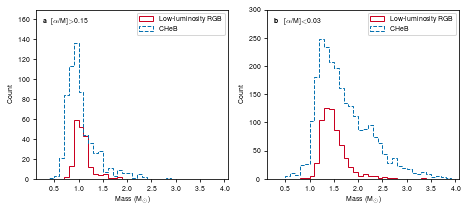

In [11]:
import matplotlib.colors
norm = matplotlib.colors.Normalize(vmin=0.6,vmax=2.2)

# gridspec_kw = {'left':0.09, 'right':0.92, 'top':0.98, 'bottom':0.08, 'wspace':0.2, 'hspace':0.2}
gridspec_kw = {'left':0.09, 'right':0.92, 'top':0.98, 'bottom':0.15, 'wspace':0.2, 'hspace':0.20}
# fig, axes = plt.subplots(figsize=[15,5], nrows=1, ncols=3, squeeze=False, gridspec_kw=gridspec_kw) #
fig, axes = plt.subplots(figsize=nature_size('double', ratio=0.4), nrows=1, ncols=2, squeeze=False, gridspec_kw=gridspec_kw)
axes = axes.reshape(-1)


bins = np.arange(0.3, 4.0, 0.1)
rgbhist = {'bins':bins, 'density':False, 'histtype':'step', 'linestyle':'-', 'color':red, 'label':'Low-luminosity RGB'}
hebhist = {'bins':bins, 'density':False, 'histtype':'step', 'linestyle':'--', 'color':blue, 'label':'CHeB'}


thick = (stars['ALPHA_M']>0.15)
thin = (stars['ALPHA_M']<0.03)
rgb = (stars['Phase']==1) & (stars['numax']>80) & (stars['M_H']>-10) & (stars['ALPHA_M']>-10) & thick
heb = (stars['Phase']==2) & (stars['M_H']>-10) & (stars['ALPHA_M']>-10) & thick

axes[0].hist(stars.loc[rgb,'RGBcorM'],**rgbhist)
axes[0].hist(stars.loc[heb,'ClcorM'],**hebhist)


rgb = (stars['Phase']==1) & (stars['numax']>80) & (stars['M_H']>-10) & (stars['ALPHA_M']>-10) & thin
heb = (stars['Phase']==2) & (stars['M_H']>-10) & (stars['ALPHA_M']>-10) & thin

axes[1].hist(stars.loc[rgb,'RGBcorM'],**rgbhist)
axes[1].hist(stars.loc[heb,'ClcorM'],**hebhist)

for iax in [0,1]:
    axes[iax].set_xlabel('Mass (M$_{\\odot}$)')
    axes[iax].set_ylabel('Count')
    axes[iax].legend(fontsize=fontsize)

labels = ['{\\textbf{a}}\ \ [$\\alpha$/M]$>$0.15', '{\\textbf{b}} \ \    [$\\alpha$/M]$<$0.03']
# labels = ['a) ', 'b) ']
for iax, ax in enumerate(axes):
    ax.text(0.04, 0.92, labels[iax], transform=ax.transAxes, fontsize=fontsize)

axes[0].set_ylim(0., 170)
axes[1].set_ylim(0., 300)


arrowprops = {'width':10, 'headwidth':10, 'headlength':10}
arrowprops = {'arrowstyle':'->'}

# (arrow coord), (text coord)
axes[0].annotate('High-mass high-$\\alpha$', (32.,3.2), (45,3.18),  fontsize=fontsize, va='center', arrowprops=arrowprops)
axes[0].annotate('Low-mass low-$\\alpha$', (32.,3.2), (45,3.18),  fontsize=fontsize, va='center', arrowprops=arrowprops)

plt.savefig(overleaf_path+'Fig_main_3_alpha.pdf')